1. 군집화(Clustering) : Kmeans

예측된 클러스터 레이블(앞 10개): [1 1 1 1 1 1 1 1 1 1]
클러스터 중심 좌표:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


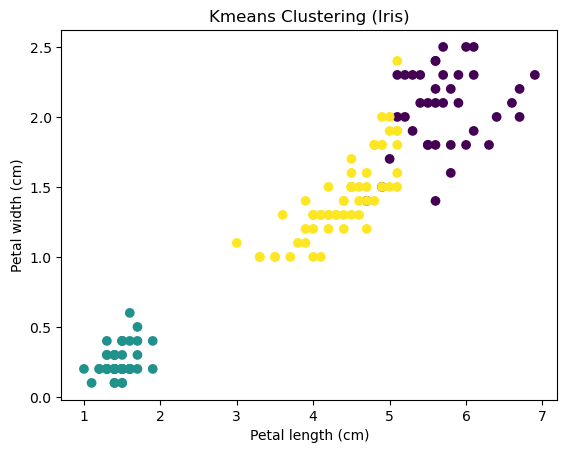

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# KMeans 모델 (군집 3개)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

print("예측된 클러스터 레이블(앞 10개):", y_pred[:10])
print("클러스터 중심 좌표:", kmeans.cluster_centers_, sep='\n')

# 시각화(Petal)
plt.scatter(X[:,2], X[:,3], c=y_pred, cmap="viridis")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Kmeans Clustering (Iris)")
plt.show()

평가 지표
- Inertia (Elbow) : 군집 내 거리의 제곱 합
- Silhouette Score : 군집 내 응집도와 군집 간 분리도를 종합 평가

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

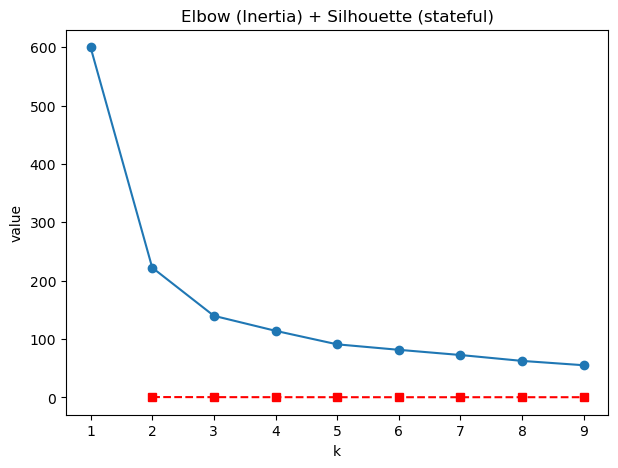

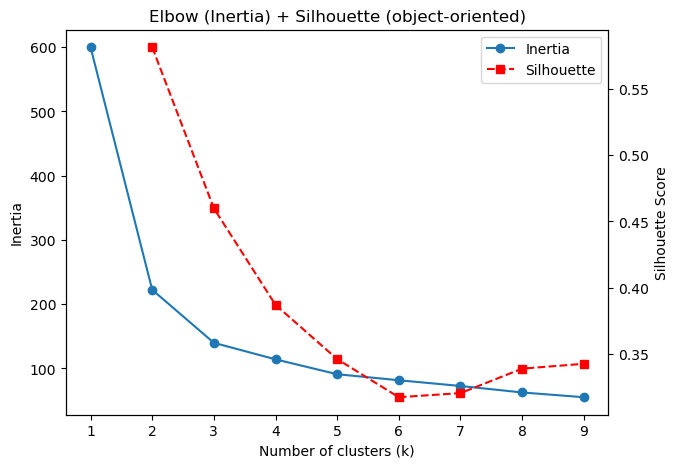

   k     inertia  silhouette
0  2  222.361705    0.581750
1  3  139.820496    0.459948
2  4  114.092547    0.386941
3  5   90.927514    0.345901
4  6   81.544391    0.317079
5  7   72.631144    0.320197
6  8   62.540606    0.338692
7  9   55.119493    0.342360


In [21]:
# 군집 품질 평가 : Inertia (Elbow) + Silhouette
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data

# KMeans도 거리(유클리드) 기반 알고리즘 -> 스케일링 권장(단위/범위가 큰 특성이 군집화 지배하지 않도록) => 파이프라인 사용
def make_pipeline(k, random_state=42):
  return Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=k, n_init=10, random_state=random_state))
  ])

# Inertia : 내부 응집도
inertia_k_range = range(1, 10)
inertias = []

for k in inertia_k_range:
  pipe = make_pipeline(k)
  pipe.fit(X)
  inertias.append(pipe.named_steps["kmeans"].inertia_)

# Silhouette : 응집도 + 분리도
silhouette_k_range = range(2, 10) # 이론적으로 2부터 정의됨
silhouettes = []

for k in silhouette_k_range:
  pipe = make_pipeline(k)
  
  # pipe.~ : 스케일링된 공간 적용
  # silhouette_score(DATA, LABELS) : 사용자가 입력 -> 스케일링된 X를 꺼내서 입력
  labels = pipe.fit_predict(X)
  X_scaled = pipe.named_steps["scaler"].transform(X)

  silhouettes.append(silhouette_score(X_scaled, labels))

# Plot

# 1) plt.plot : Stateful
plt.figure(figsize=(7,5))
plt.plot(inertia_k_range, inertias, marker='o', label="Inertia")
plt.plot(silhouette_k_range, silhouettes, color='r', marker='s', linestyle='--', label='Silhouette')
plt.xlabel("k")
plt.ylabel("value")
plt.title("Elbow (Inertia) + Silhouette (stateful)")
# inertia 값은 수백 단위, silhouette 값은 0~1사이이므로 siilhouette는 눌려서 안보임

# 2) plt.subplots : Object-oriented
fig, ax1 = plt.subplots(figsize=(7,5))

# inertia (elbow)
ax1.plot(inertia_k_range, inertias, marker='o', label='Inertia')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Inertia")

# silhouette
ax2 = ax1.twinx() # x축 공유
ax2.plot(silhouette_k_range, silhouettes, color='r', marker='s', linestyle='--', label='Silhouette')
ax2.set_ylabel("Silhouette Score")

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.title("Elbow (Inertia) + Silhouette (object-oriented)")
plt.show()

# 수치 비교
df = pd.DataFrame({
  "k": list(silhouette_k_range),
  "inertia": [inertias[k-1] for k in silhouette_k_range],
  "silhouette": silhouettes
})
print(df)

Inertia
- 내부 응집도. 작을 수록 좋음
- BUT, K가 커지면 자동으로 줄어들기 때문에 엘보우 체크
- 1 > 2가 극심한 건 당연 (클러스터링 시작) => 2 이후부터 관찰해서 엘보우 지점 찾기

Silhouette
- 응집도 + 분리도. -1 ~ 1
- 1에 가까울수록 좋다
- 0 근처 -> 군집 경계에 있어 애매함
- 음수 -> 다른 군집에 속하는 게 낫다 (군집 잘못 배치)

실루엣 점수가 가장 높은 K지점(피크)가 K 후보<br>
단, 실루엣 점수 피크는 실제 라벨수와 일치하지 않는다.<br>

따라서, K는 silhouette + inertia(엘보우) + 도메인 지식 종합해서 결정
- 실루엣 -> K=2
- 엘보우 -> K=3
- 도메인 지식 -> 실제 품종 3개이므로 K=3

<br><br>
샘플별 실루엣 분포 : 플롯 시각화

PCA로 차원 축소 후 실루엣 점수의 변화 비교